In [1]:
import os
import pandas as pd
import kagglehub

# Baixando o dataset
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
print("Path para os arquivos:", path)

# Listar arquivos CSV
files = [f for f in os.listdir(path) if f.endswith('.csv')]
print("Arquivos CSV encontrados:", files)

# Carregar os DataFrames em um dicionário
dfs = {}
for f in files:
    full_path = os.path.join(path, f)
    df_temp = pd.read_csv(full_path)

    # Transformar a coluna alvo corretamente
    if 'Diabetes_012' in df_temp.columns:
        # Mapear valores 0 → 0 (sem diabetes ou só gravidez), 1 e 2 → 1 (pré-diabetes e diabetes)
        df_temp['Diabetes_binary'] = df_temp['Diabetes_012'].map(lambda x: 0 if x == 0 else 1)
        
        # Dropar a coluna original
        df_temp.drop(columns=['Diabetes_012'], inplace=True)

    elif 'Diabetes_binary' in df_temp.columns:
        # Garantir que está tudo certo
        df_temp['Diabetes_binary'] = df_temp['Diabetes_binary'].map(lambda x: 0 if x == 0 else 1)

    dfs[f] = df_temp

# Verificar diferenças nas colunas
print("\nComparando colunas dos arquivos:")
all_columns = {name: set(df.columns) for name, df in dfs.items()}
for name, columns in all_columns.items():
    print(f"- {name}: {len(columns)} colunas\n")

# Comparar quais colunas são diferentes
base = list(all_columns.values())[0]
for name, columns in all_columns.items():
    diff = base.symmetric_difference(columns)
    if diff:
        print(f"⚠️ Diferenças entre base e {name}: {diff}")
    else:
        print(f"✅ {name} tem as mesmas colunas da base.")

# Identificar colunas comuns
common_columns = set.intersection(*all_columns.values())

# Juntar os DataFrames com base nas colunas comuns
df = pd.concat([df_temp[list(common_columns)] for df_temp in dfs.values()], ignore_index=True)

# Exibir resultado final
print("\n✅ Shape do DataFrame combinado:", df.shape)
print(df["Diabetes_binary"].value_counts())
pd.set_option('display.max_columns', None)
df.head()


c:\Users\flavio\VsCodeProjects\postech\tf_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path para os arquivos: C:\Users\flavio\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1
Arquivos CSV encontrados: ['diabetes_012_health_indicators_BRFSS2015.csv', 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv']

Comparando colunas dos arquivos:
- diabetes_012_health_indicators_BRFSS2015.csv: 22 colunas

- diabetes_binary_5050split_health_indicators_BRFSS2015.csv: 22 colunas

- diabetes_binary_health_indicators_BRFSS2015.csv: 22 colunas

✅ diabetes_012_health_indicators_BRFSS2015.csv tem as mesmas colunas da base.
✅ diabetes_binary_5050split_health_indicators_BRFSS2015.csv tem as mesmas colunas da base.
✅ diabetes_binary_health_indicators_BRFSS2015.csv tem as mesmas colunas da base.

✅ Shape do DataFrame combinado: (578052, 22)
Diabetes_binary
0    467383
1    110669
Name: count, dtype: int64


,BMI,Diabetes_binary,Sex,DiffWalk,AnyHealthcare,MentHlth,PhysHlth,PhysActivity,HighBP,NoDocbcCost,HeartDiseaseorAttack,Stroke,Income,Age,HvyAlcoholConsump,GenHlth,HighChol,CholCheck,Veggies,Education,Fruits,Smoker
0,40.0,0,0.0,1.0,1.0,18.0,15.0,0.0,1.0,0.0,0.0,0.0,3.0,9.0,0.0,5.0,1.0,1.0,1.0,4.0,0.0,1.0
1,25.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.0,0.0,3.0,0.0,0.0,0.0,6.0,0.0,1.0
2,28.0,0,0.0,1.0,1.0,30.0,30.0,0.0,1.0,1.0,0.0,0.0,8.0,9.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,0.0
3,27.0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,11.0,0.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0
4,24.0,0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,11.0,0.0,2.0,1.0,1.0,1.0,5.0,1.0,0.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df.head(20)

,BMI,Diabetes_binary,Sex,DiffWalk,AnyHealthcare,MentHlth,PhysHlth,PhysActivity,HighBP,NoDocbcCost,HeartDiseaseorAttack,Stroke,Income,Age,HvyAlcoholConsump,GenHlth,HighChol,CholCheck,Veggies,Education,Fruits,Smoker
0,40.0,0,0.0,1.0,1.0,18.0,15.0,0.0,1.0,0.0,0.0,0.0,3.0,9.0,0.0,5.0,1.0,1.0,1.0,4.0,0.0,1.0
1,25.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.0,0.0,3.0,0.0,0.0,0.0,6.0,0.0,1.0
2,28.0,0,0.0,1.0,1.0,30.0,30.0,0.0,1.0,1.0,0.0,0.0,8.0,9.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,0.0
3,27.0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,11.0,0.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0
4,24.0,0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,11.0,0.0,2.0,1.0,1.0,1.0,5.0,1.0,0.0
5,25.0,0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,8.0,10.0,0.0,2.0,1.0,1.0,1.0,6.0,1.0,1.0
6,30.0,0,0.0,0.0,1.0,0.0,14.0,0.0,1.0,0.0,0.0,0.0,7.0,9.0,0.0,3.0,0.0,1.0,0.0,6.0,0.0,1.0
7,25.0,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,11.0,0.0,3.0,1.0,1.0,1.0,4.0,0.0,1.0
8,30.0,1,0.0,1.0,1.0,30.0,30.0,0.0,1.0,0.0,1.0,0.0,1.0,9.0,0.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0
9,24.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,0.0,2.0,0.0,1.0,1.0,4.0,0.0,0.0


In [4]:
rows , col =  df.shape
print(f"Número de Linhas : {rows} \nNúmero de Colunas : {col}")

Número de Linhas : 578052 
Número de Colunas : 22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578052 entries, 0 to 578051
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BMI                   578052 non-null  float64
 1   Diabetes_binary       578052 non-null  int64  
 2   Sex                   578052 non-null  float64
 3   DiffWalk              578052 non-null  float64
 4   AnyHealthcare         578052 non-null  float64
 5   MentHlth              578052 non-null  float64
 6   PhysHlth              578052 non-null  float64
 7   PhysActivity          578052 non-null  float64
 8   HighBP                578052 non-null  float64
 9   NoDocbcCost           578052 non-null  float64
 10  HeartDiseaseorAttack  578052 non-null  float64
 11  Stroke                578052 non-null  float64
 12  Income                578052 non-null  float64
 13  Age                   578052 non-null  float64
 14  HvyAlcoholConsump     578052 non-null  float64
 15  

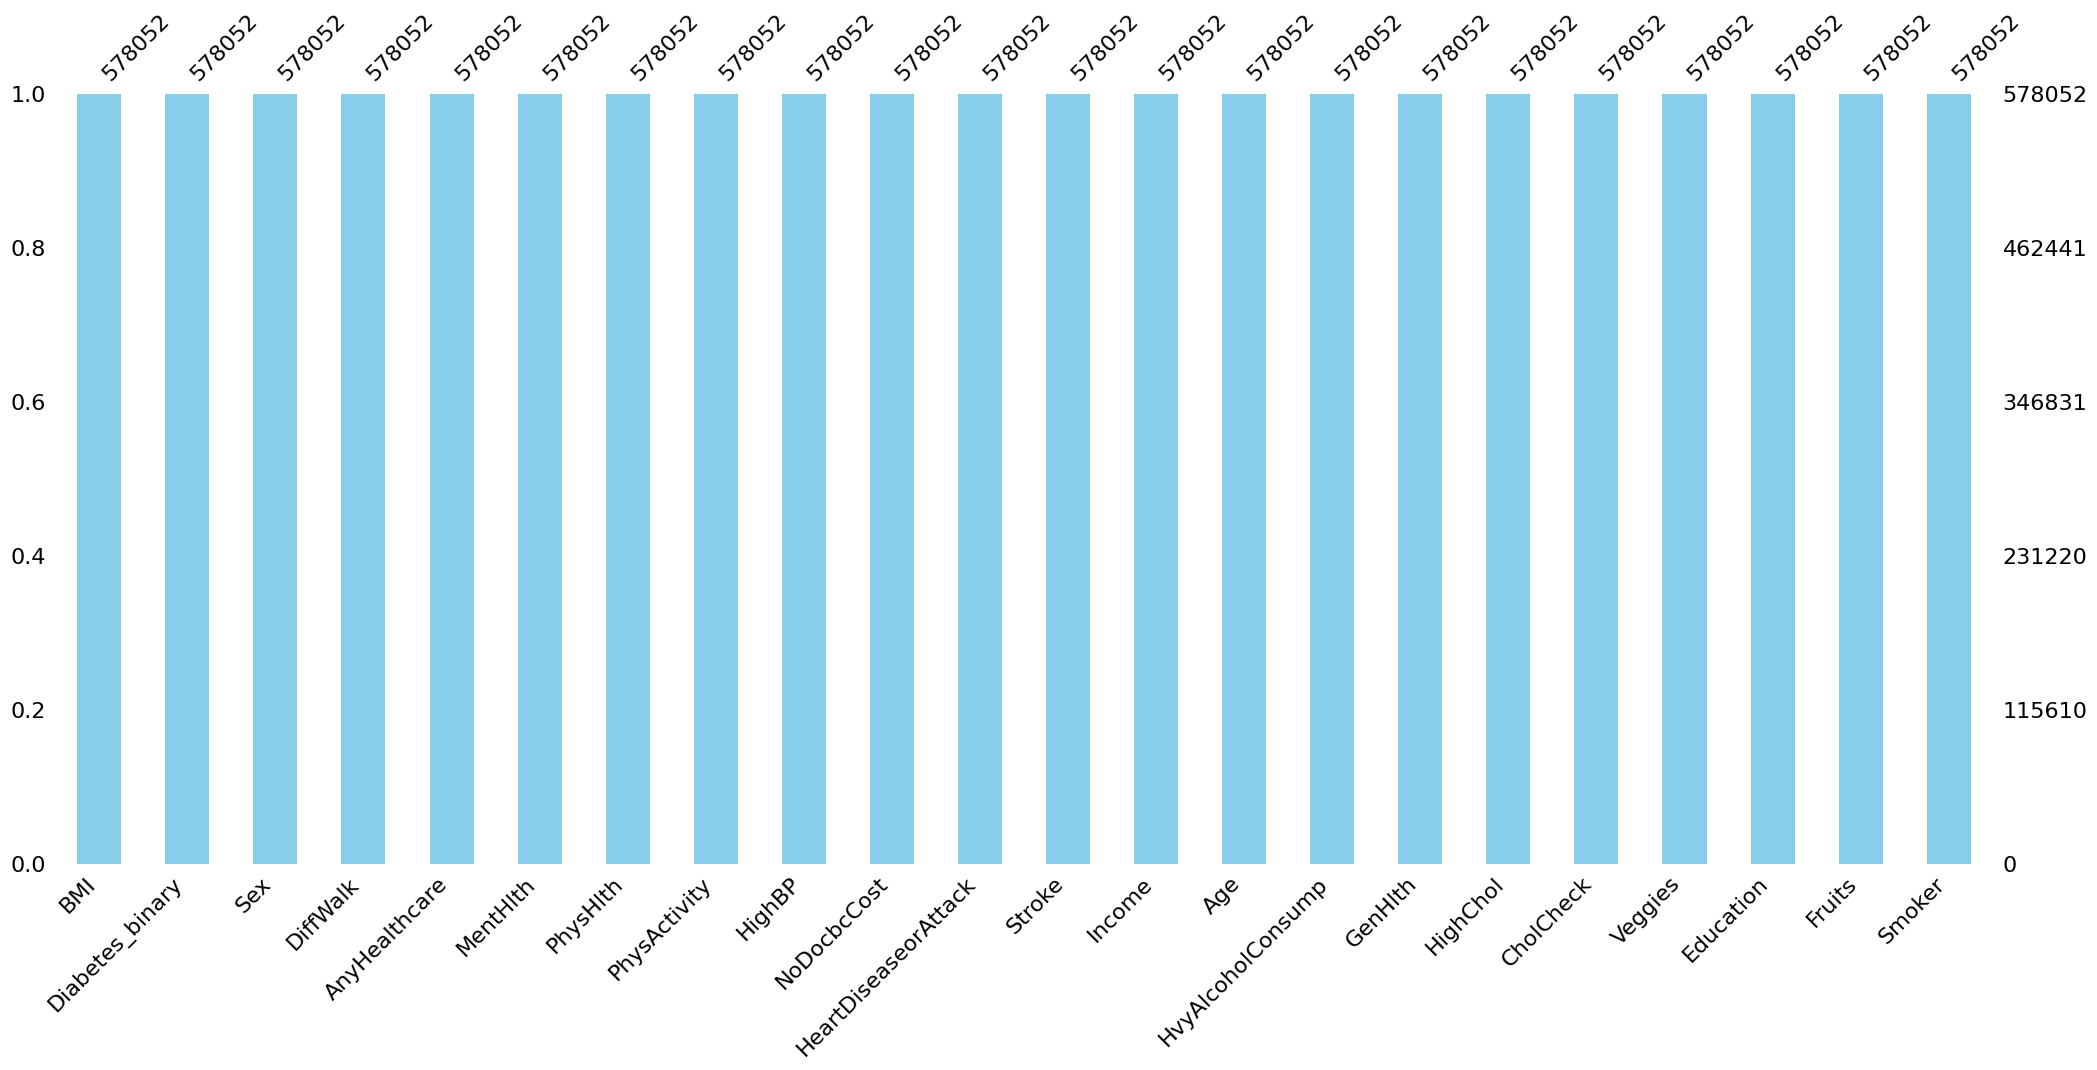

In [6]:
import missingno as msno
msno.bar(df, color='skyblue')
plt.show()


In [7]:
pd.set_option('display.max_rows', None)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,578052.0,28.562700,6.689993,12.0,24.00,27.0,32.0,98.0
Diabetes_binary,578052.0,0.191452,0.393444,0.0,0.00,0.0,0.0,1.0
Sex,578052.0,0.442379,0.496669,0.0,0.00,0.0,1.0,1.0
DiffWalk,578052.0,0.178558,0.382982,0.0,0.00,0.0,0.0,1.0
AnyHealthcare,578052.0,0.951530,0.214757,0.0,1.00,1.0,1.0,1.0
MentHlth,578052.0,3.254145,7.509915,0.0,0.00,0.0,2.0,30.0
PhysHlth,578052.0,4.433878,8.908079,0.0,0.00,0.0,3.0,30.0
PhysActivity,578052.0,0.750000,0.433013,0.0,0.75,1.0,1.0,1.0
HighBP,578052.0,0.445444,0.497015,0.0,0.00,0.0,1.0,1.0
NoDocbcCost,578052.0,0.085368,0.279428,0.0,0.00,0.0,0.0,1.0


In [8]:
#checking unique values in different variables
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['Valores Unicos nas colunas']).transpose()

,Valores Unicos nas colunas
BMI,84
Diabetes_binary,2
Sex,2
DiffWalk,2
AnyHealthcare,2
MentHlth,31
PhysHlth,31
PhysActivity,2
HighBP,2
NoDocbcCost,2


In [9]:
# Checking duplicates rows in dataset df1 to eliminate them

duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  344018


,BMI,Diabetes_binary,Sex,DiffWalk,AnyHealthcare,MentHlth,PhysHlth,PhysActivity,HighBP,NoDocbcCost,HeartDiseaseorAttack,Stroke,Income,Age,HvyAlcoholConsump,GenHlth,HighChol,CholCheck,Veggies,Education,Fruits,Smoker
1242,27.0,1,0.0,1.0,1.0,0.0,30.0,0.0,1.0,0.0,0.0,0.0,5.0,10.0,0.0,5.0,1.0,1.0,1.0,4.0,0.0,1.0
1563,21.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,1.0,0.0,1.0,1.0,6.0,1.0,1.0
2700,32.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,0.0,2.0,0.0,1.0,1.0,6.0,1.0,0.0
3160,21.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0
3332,24.0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0


In [10]:
df_clean = df.drop_duplicates().copy()
# Dimensões do DataFrame original
rows_orig, col_orig = df.shape
print(f"Número de Linhas (original): {rows_orig} \nNúmero de Colunas: {col_orig}")

# Dimensões após remoção de duplicatas
rows_clean, col_clean = df_clean.shape
print(f"Número de Linhas (sem duplicatas): {rows_clean} \nNúmero de Colunas: {col_clean}")

# Quantidade de linhas removidas
print(f"\nTotal de duplicatas removidas: {rows_orig - rows_clean}")

Número de Linhas (original): 578052 
Número de Colunas: 22
Número de Linhas (sem duplicatas): 234034 
Número de Colunas: 22

Total de duplicatas removidas: 344018


---
# **Visualização dos Dados**



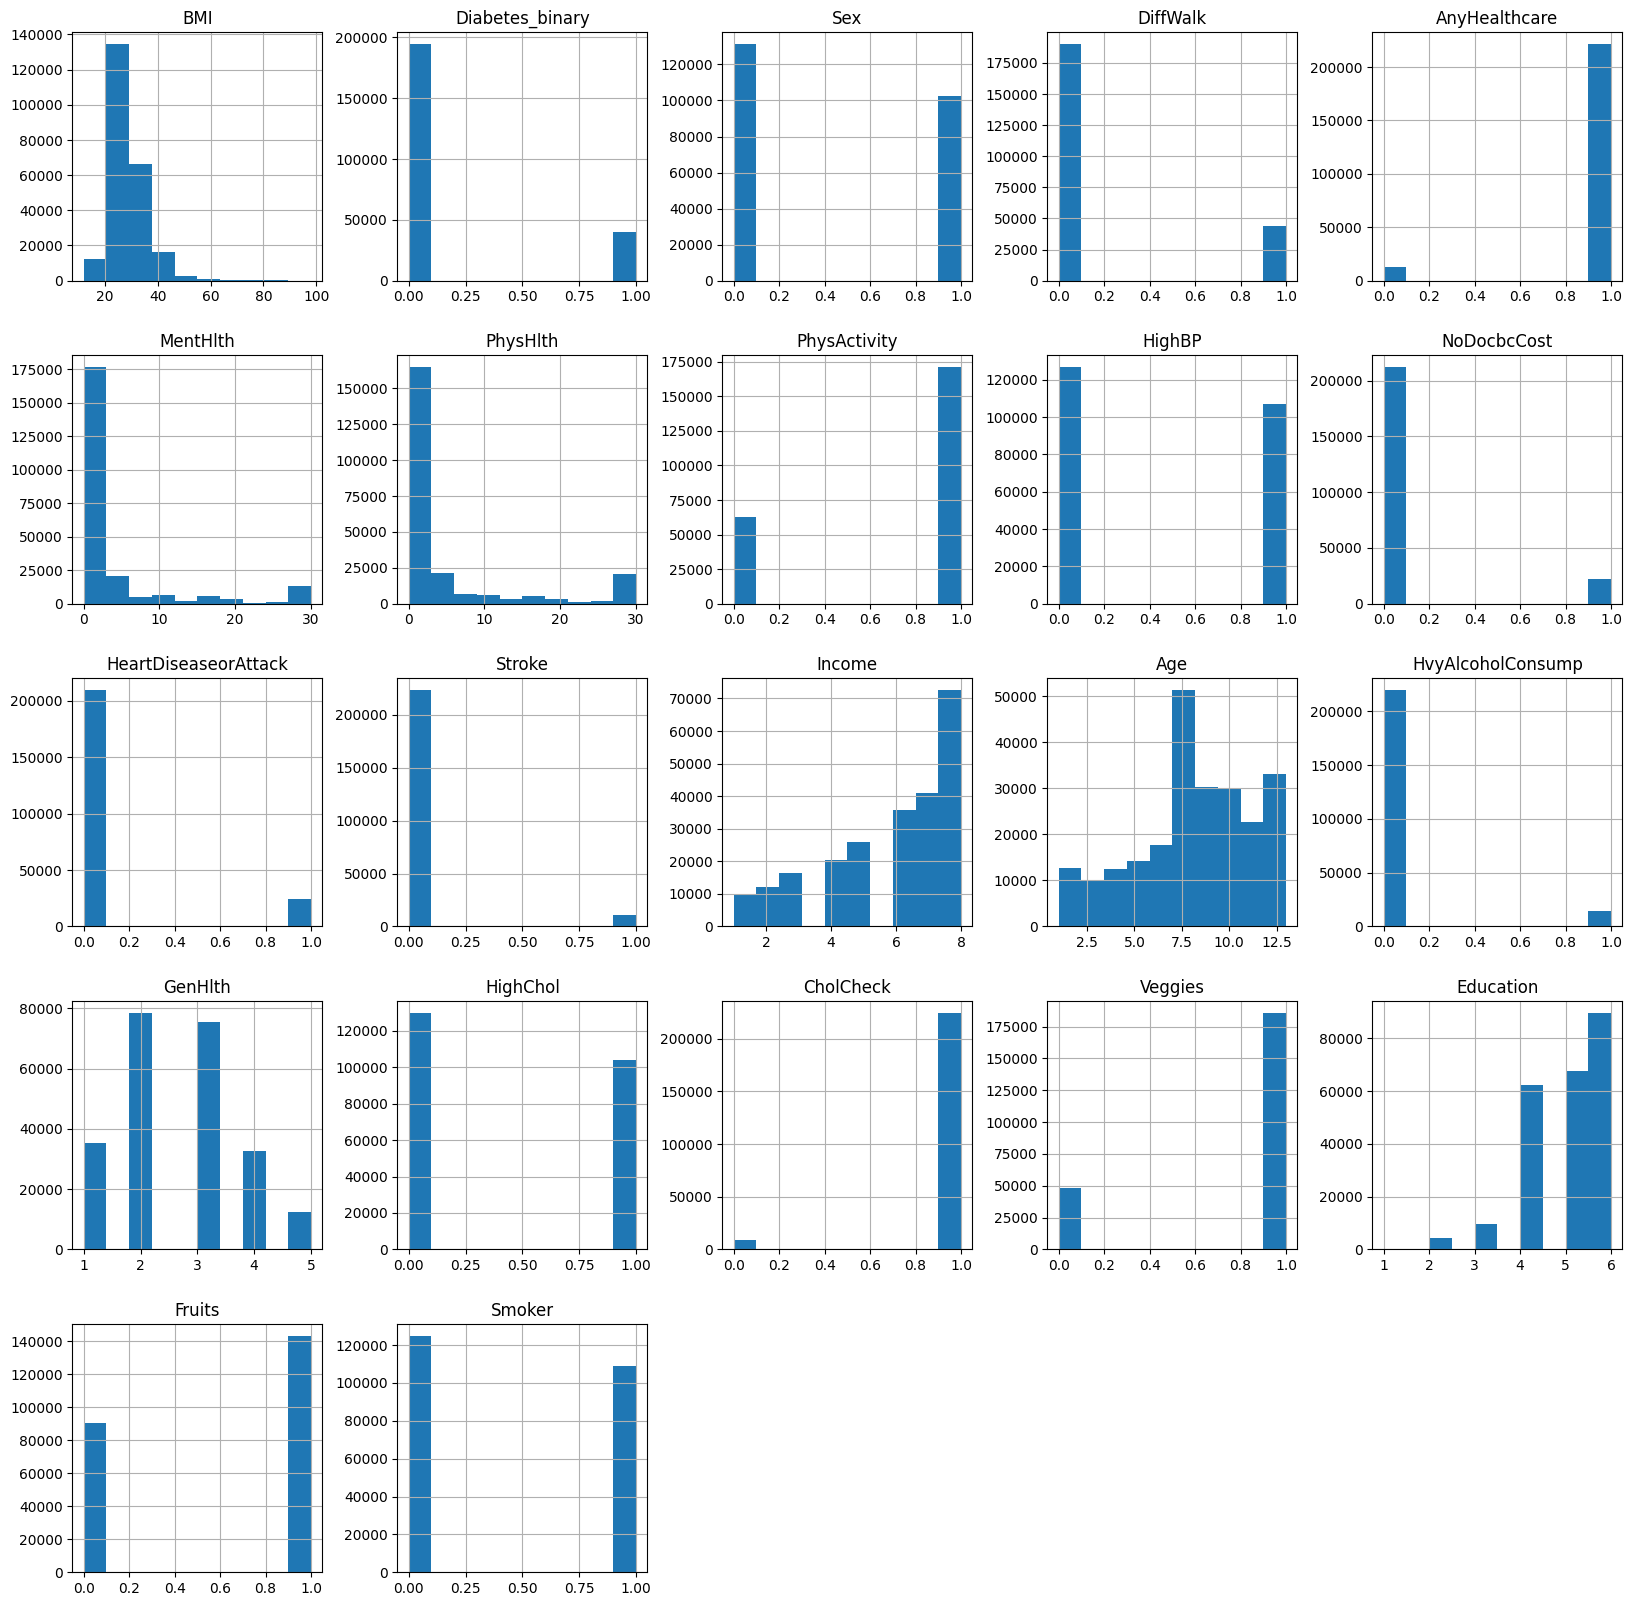

In [11]:
df_clean.hist(figsize = (20,20))
plt.show()

📊 Correlação com Diabetes_binary:
GenHlth                 0.275863
HighBP                  0.254186
BMI                     0.205788
DiffWalk                0.202984
HighChol                0.198763
Age                     0.180750
HeartDiseaseorAttack    0.163467
PhysHlth                0.154819
Stroke                  0.095784
CholCheck               0.074581
MentHlth                0.056839
Smoker                  0.045288
Sex                     0.030248
NoDocbcCost             0.024483
AnyHealthcare           0.023497
Fruits                 -0.024513
Veggies                -0.042293
HvyAlcoholConsump      -0.064930
PhysActivity           -0.100085
Education              -0.105410
Income                 -0.143738
Name: Diabetes_binary, dtype: float64


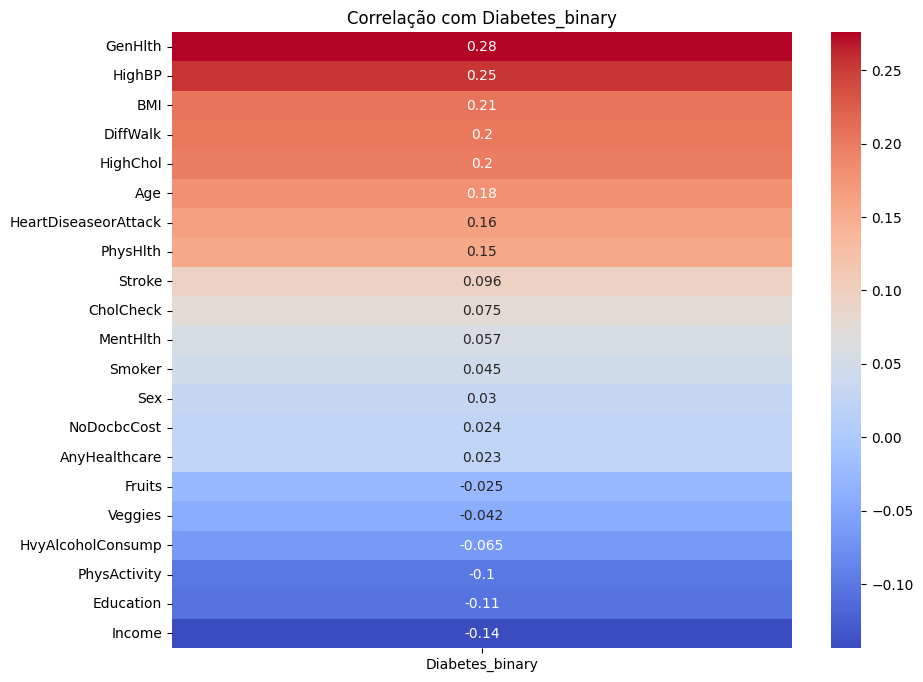

In [12]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Calcular a correlação
correlation = df_clean.corr(numeric_only=True)

# Correlacionar com o target
cor_target = correlation['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)

# Exibir as variáveis mais correlacionadas
print("📊 Correlação com Diabetes_binary:")
print(cor_target)

# Visualizar com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_target.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlação com Diabetes_binary")
plt.show()


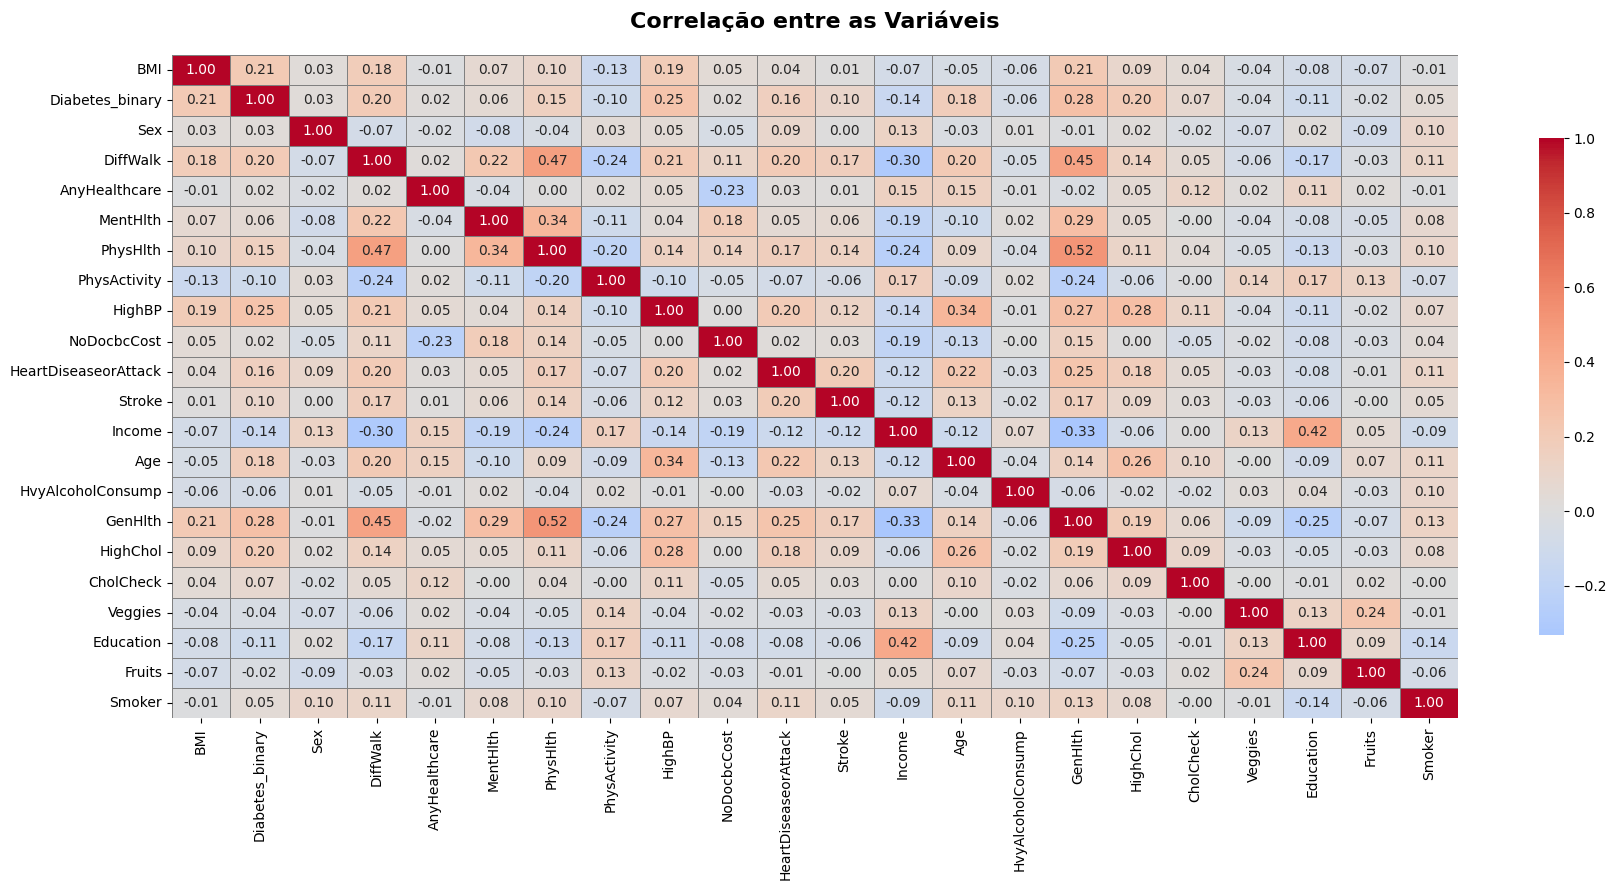

In [13]:
corr = df_clean.corr(numeric_only=True)  # garante apenas colunas numéricas

fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.75},
    ax=ax
)

ax.set_title("Correlação entre as Variáveis", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


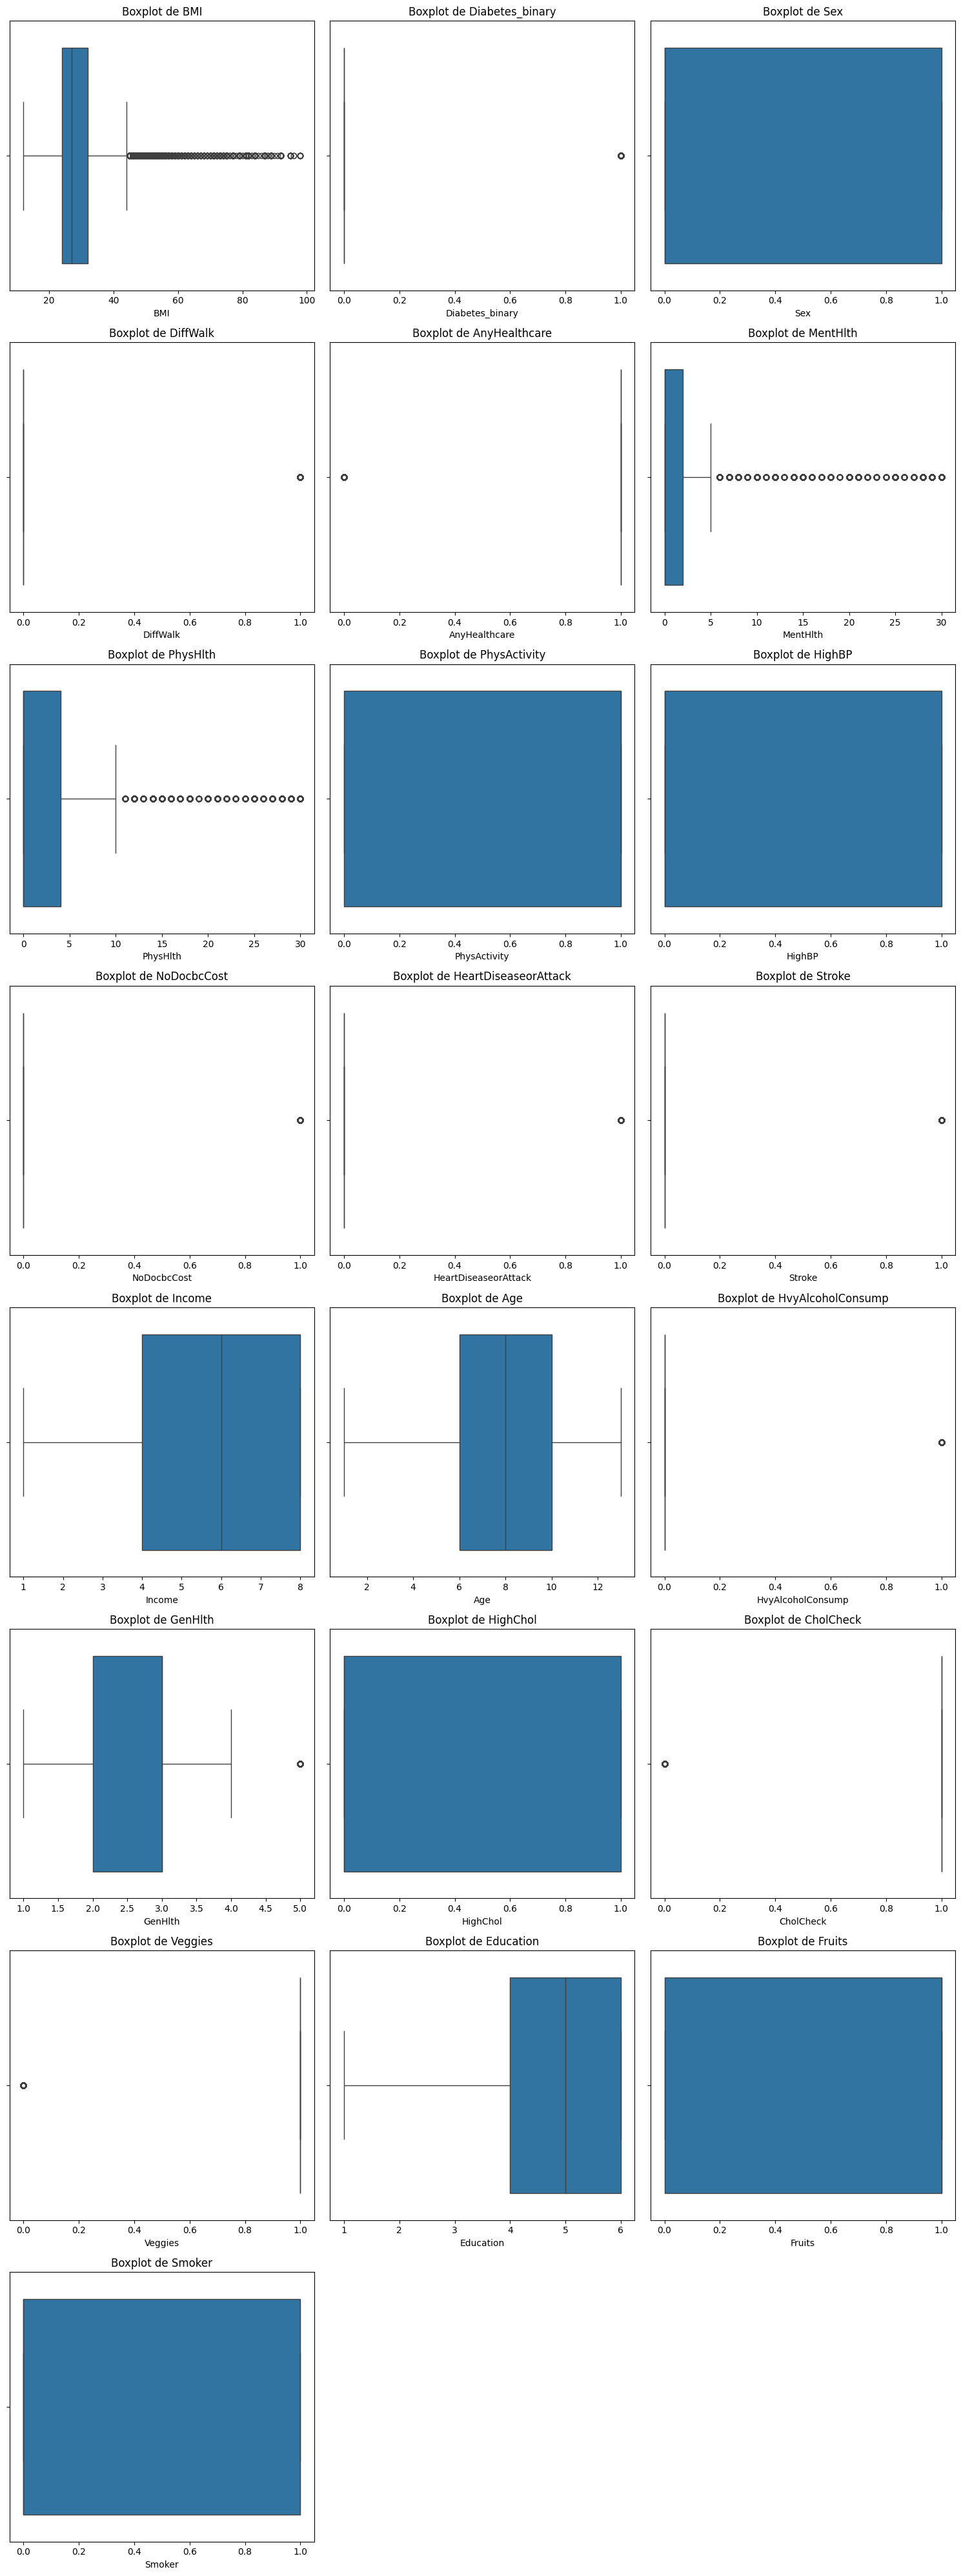

In [14]:
# Selecionar apenas colunas numéricas
numeric_columns = df_clean.select_dtypes(include='number').columns

# Criar subplots
n_cols = 3
n_rows = -(-len(numeric_columns) // n_cols)  # arredondamento para cima
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # transforma em vetor para acesso simples

# Criar boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df_clean, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

# Remover eixos não usados (caso sobre espaço no grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
df_clean['Diabetes_binary'].unique()

array([0, 1], dtype=int64)

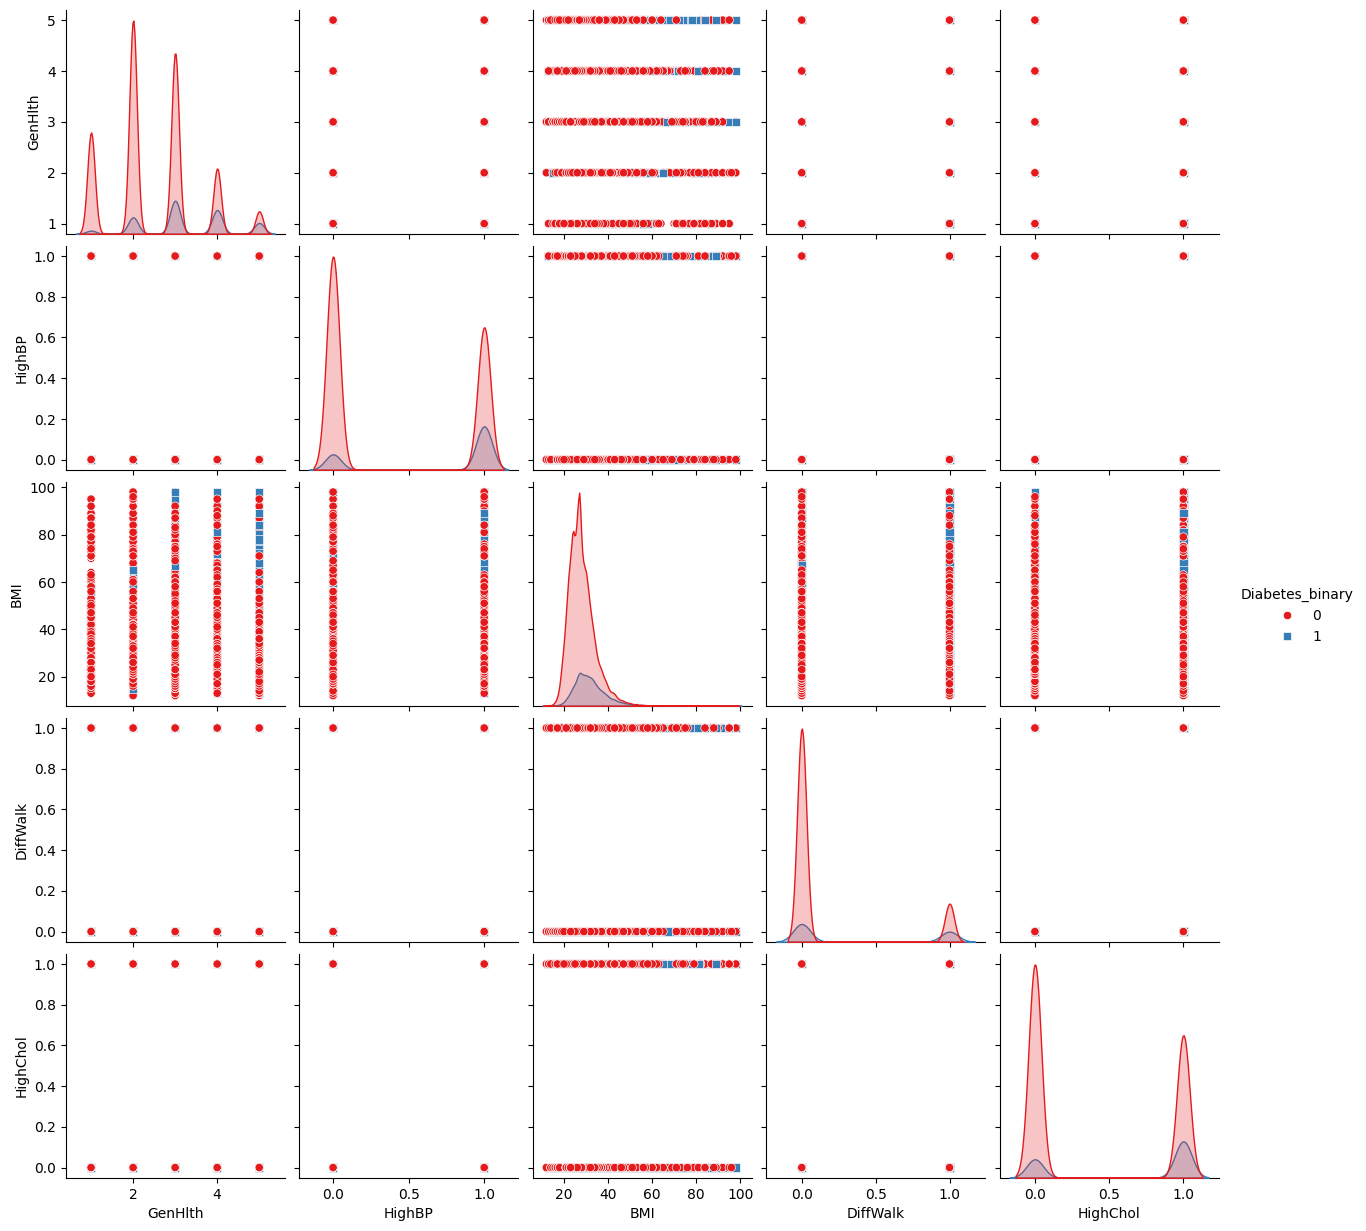

In [16]:
cols = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Diabetes_binary']
sns.pairplot(data=df_clean[cols], hue='Diabetes_binary', diag_kind='kde', markers=["o", "s"], palette="Set1")
plt.show()


In [17]:
# Mapeando os valores 0 e 1 para descrições
diabetes_map = {0: "Não Diabético", 1: "Diabético"}

# Contando os valores e renomeando os índices com base no mapa
tabela_diabetes = df_clean["Diabetes_binary"].value_counts().rename(index=diabetes_map)

# Exibindo a tabela
print(tabela_diabetes)


Diabetes_binary
Não Diabético    194377
Diabético         39657
Name: count, dtype: int64


📊 Correlação com Diabetes_binary:
GenHlth                 0.275863
HighBP                  0.254186
BMI                     0.205788
DiffWalk                0.202984
HighChol                0.198763
Age                     0.180750
HeartDiseaseorAttack    0.163467
PhysHlth                0.154819
Stroke                  0.095784
CholCheck               0.074581
MentHlth                0.056839
Smoker                  0.045288
Sex                     0.030248
NoDocbcCost             0.024483
AnyHealthcare           0.023497
Fruits                 -0.024513
Veggies                -0.042293
HvyAlcoholConsump      -0.064930
PhysActivity           -0.100085
Education              -0.105410
Income                 -0.143738
Name: Diabetes_binary, dtype: float64


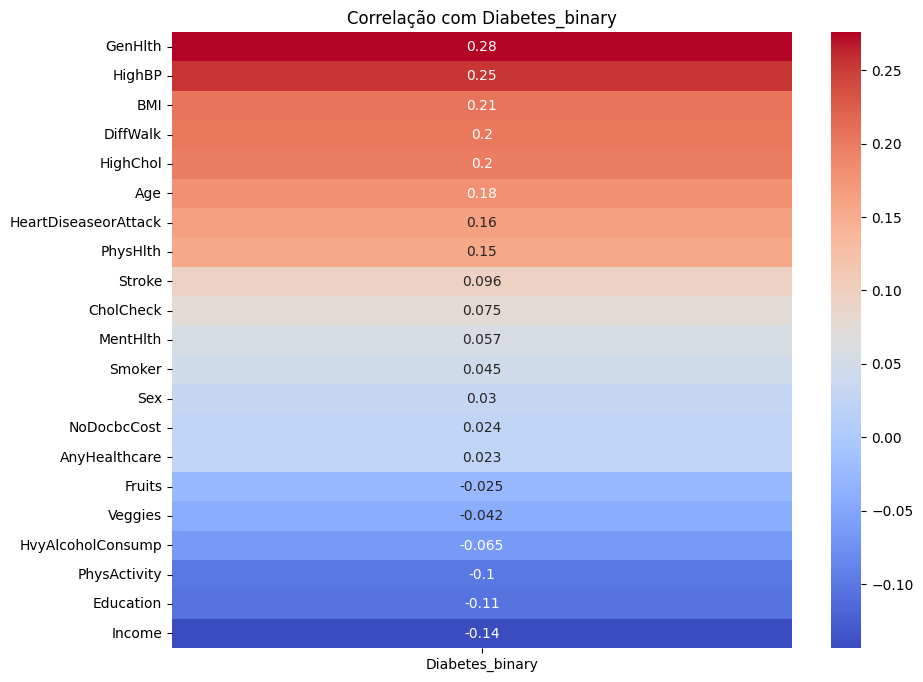

In [18]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Calcular a correlação
correlation = df_clean.corr(numeric_only=True)

# Correlacionar com o target
cor_target = correlation['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)

# Exibir as variáveis mais correlacionadas
print("📊 Correlação com Diabetes_binary:")
print(cor_target)

# Visualizar com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_target.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlação com Diabetes_binary")
plt.show()


In [ ]:
# 1. Separar X e y ...
target = 'Diabetes_binary'
X_full = df_clean.drop(columns=[target])
y = df_clean[target]

# 2. Dividir em treino e teste
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42, stratify=y)

# 3. Treinar modelo com TODAS as variáveis
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train_full, y_train)
y_pred_full = model_full.predict(X_test_full)

print("\n📊 Modelo completo (todas as features):")
print(classification_report(y_test, y_pred_full))

# 4. Selecionar apenas as TOP 5 variáveis
top5_features = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol']
X_top5 = df_clean[top5_features]
X_train_top5, X_test_top5, _, _ = train_test_split(X_top5, y, test_size=0.3, random_state=42, stratify=y)

# 5. Treinar modelo com apenas top 5
model_top5 = RandomForestClassifier(random_state=42)
model_top5.fit(X_train_top5, y_train)
y_pred_top5 = model_top5.predict(X_test_top5)

print("\n📊 Modelo com TOP 5 features:")
print(classification_report(y_test, y_pred_top5))



📊 Modelo completo (todas as features):
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     58314
           1       0.39      0.17      0.24     11897

    accuracy                           0.81     70211
   macro avg       0.62      0.56      0.57     70211
weighted avg       0.77      0.81      0.78     70211


📊 Modelo com TOP 5 features:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     58314
           1       0.57      0.13      0.21     11897

    accuracy                           0.84     70211
   macro avg       0.71      0.55      0.56     70211
weighted avg       0.80      0.84      0.79     70211



In [20]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Definir target
target = 'Diabetes_binary'

# Definir os 10 melhores features pela correlação que você encontrou
top_10_features = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 
                   'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth']

# Top 5 é subconjunto
top_5_features = top_10_features[:5]

# Separar X e y
X_full = df.drop(columns=[target])
y = df_clean[target]

# Conjuntos de features a testar
feature_sets = {
    'Todas (21)': X_full.columns.tolist(),
    'Top 10': top_10_features,
    'Top 5': top_5_features
}

# Modelos a testar
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Treinar e avaliar cada modelo em cada conjunto de features
results = []

for feat_name, feat_list in feature_sets.items():
    X = df_clean[feat_list]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    print(f"\n🔷 Conjunto de features: {feat_name}")
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"\n📌 Modelo: {model_name} | Features: {feat_name}")
        print(classification_report(y_test, y_pred, digits=4))



🔷 Conjunto de features: Todas (21)

📌 Modelo: RandomForest | Features: Todas (21)
              precision    recall  f1-score   support

           0     0.8485    0.9448    0.8940     58314
           1     0.3900    0.1731    0.2397     11897

    accuracy                         0.8140     70211
   macro avg     0.6192    0.5589    0.5669     70211
weighted avg     0.7708    0.8140    0.7832     70211


📌 Modelo: LogisticRegression | Features: Todas (21)
              precision    recall  f1-score   support

           0     0.8501    0.9733    0.9075     58314
           1     0.5482    0.1586    0.2460     11897

    accuracy                         0.8353     70211
   macro avg     0.6992    0.5660    0.5768     70211
weighted avg     0.7989    0.8353    0.7955     70211


📌 Modelo: XGBoost | Features: Todas (21)
              precision    recall  f1-score   support

           0     0.8531    0.9710    0.9082     58314
           1     0.5586    0.1802    0.2725     11897

    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

# Configurar seaborn
sns.set(style='whitegrid')

# Target
target = 'Diabetes_binary'

# Features
top_10_features = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 
                   'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth']
top_5_features = top_10_features[:5]

# Conjuntos de features
feature_sets = {
    'Todas (21)': df_clean.drop(columns=[target]).columns.tolist(),
    'Top 10': top_10_features,
    'Top 5': top_5_features
}

# Modelos
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVC': SVC(probability=True)
}

# Lista para resultados
all_results = []

# Loop pelos conjuntos de features e modelos
for feat_name, feat_cols in feature_sets.items():
    X = df_clean[feat_cols]
    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y
